IntSlider(value=12345, description='Seed', max=99999)

FloatSlider(value=100.0, description='a', max=2000.0, min=50.0)

IntSlider(value=-1, description='Closed value', max=50, min=-50)

FloatSlider(value=33.0, description='Closed avg time(scaled by delta_t)')

IntSlider(value=1, description='Opened value', max=50, min=-50)

FloatSlider(value=11.0, description='Opened avg time(scaled by delta_t)')

FloatSlider(value=10.0, description='D', min=0.01, step=0.01)

SelectionSlider(description='Delta t', index=1, options=(0.001, 0.0001, 1e-05), value=0.0001)

IntSlider(value=50000, description='Records', max=100000, min=1000, step=1000)

VBox()

Checkbox(value=True, description='Takes previous values')

Dropdown(description='Random Force', options=('Gauss', 'Levy'), value='Gauss')

Dropdown(description='Autocorrelation method', index=2, options=('DFA', 'FFT', 'All'), value='All')

IntSlider(value=100, description='FFT lags', max=200, min=30, step=10)

Button(description='Run Model', style=ButtonStyle())

Button(description='Run Model (Test)', style=ButtonStyle())

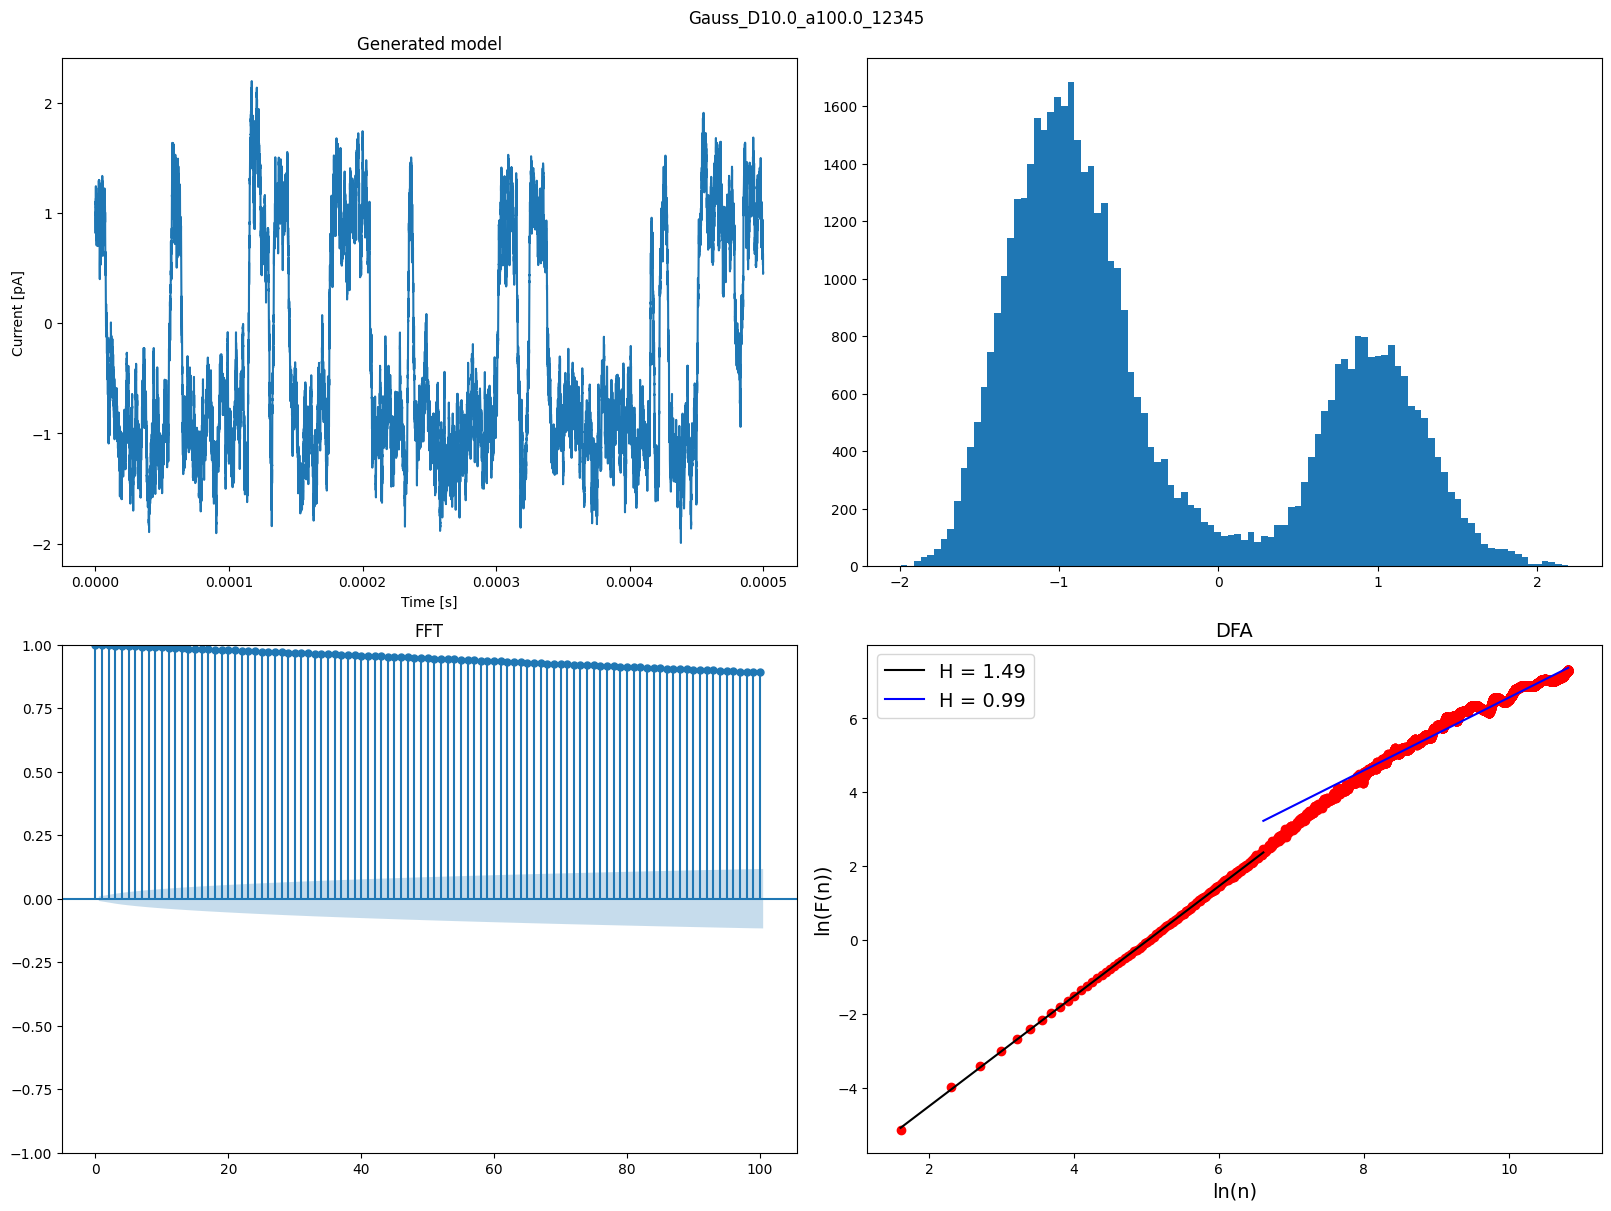

In [1]:
from ion_channel import InteractiveIonChannel

IIC = InteractiveIonChannel()
IIC.interact()

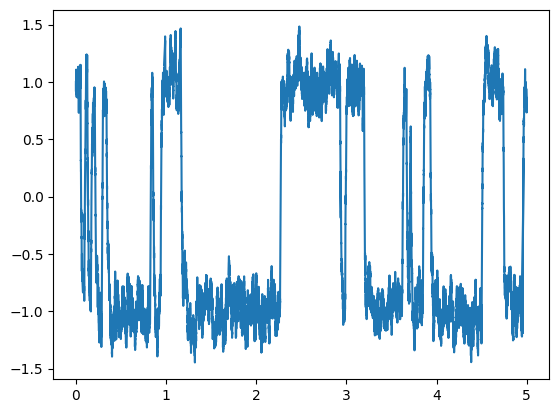

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(IIC.ion_channel.data_transposed[0][:50000], IIC.ion_channel.data_transposed[1][:50000])

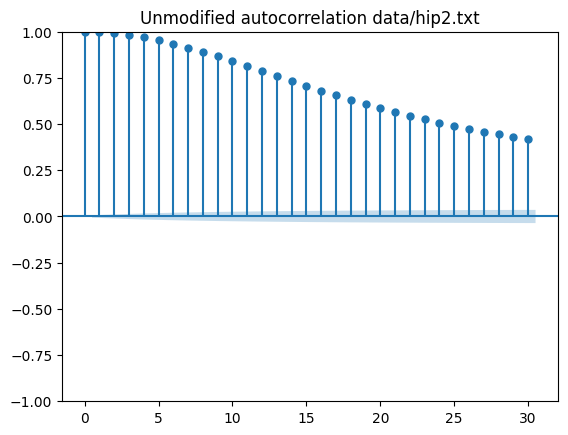

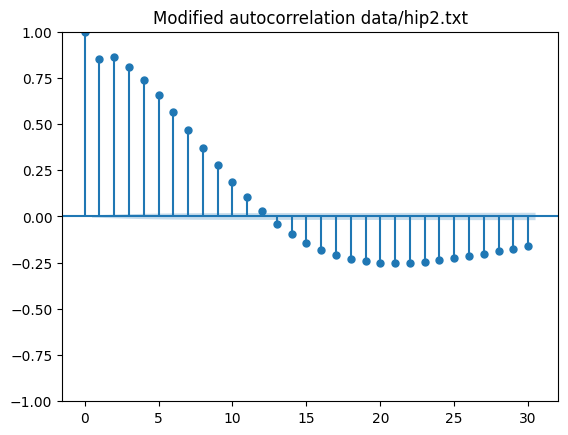

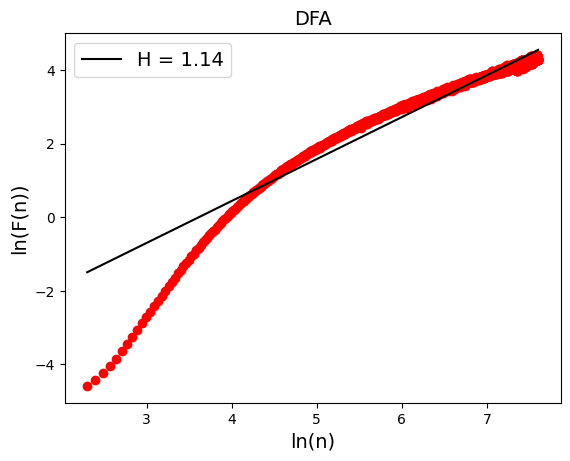

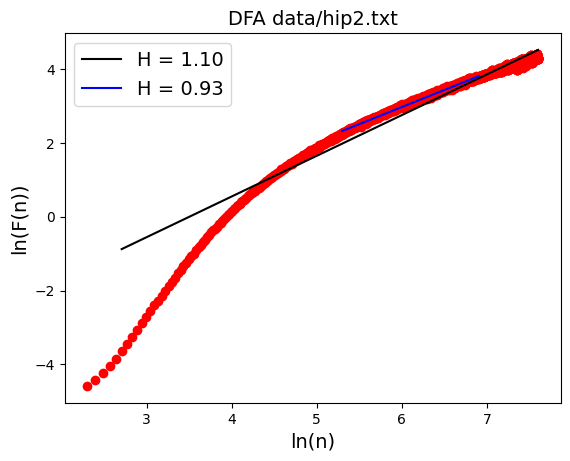

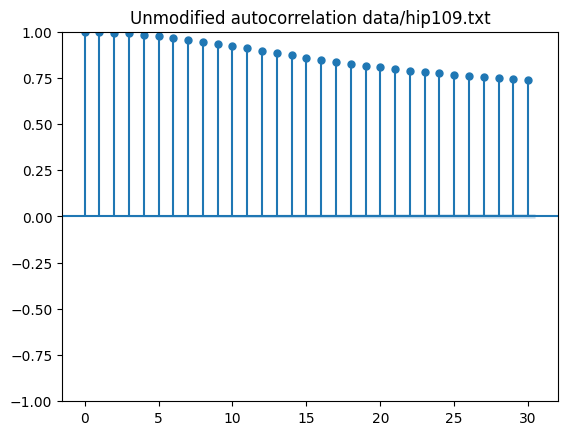

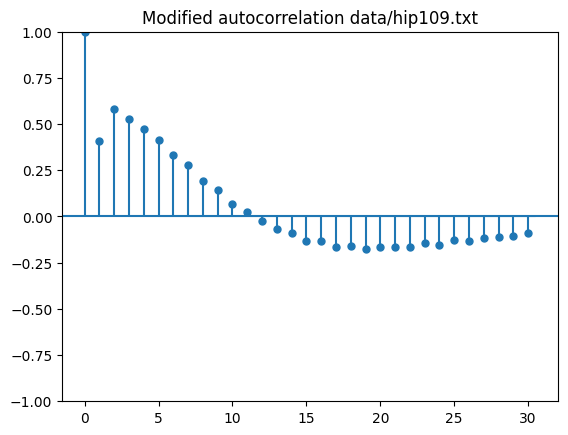

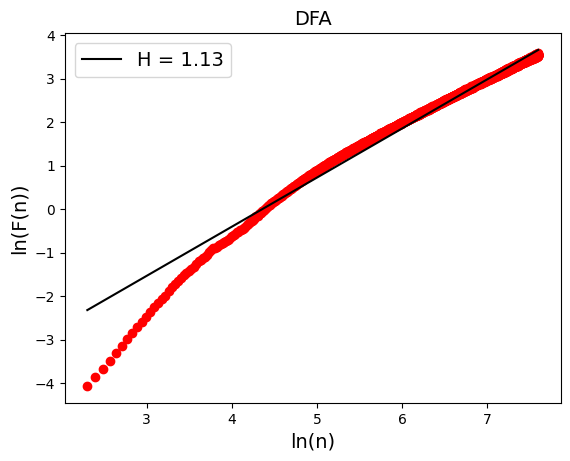

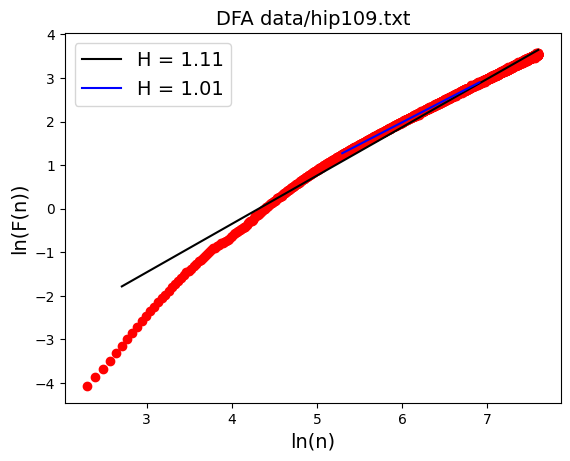

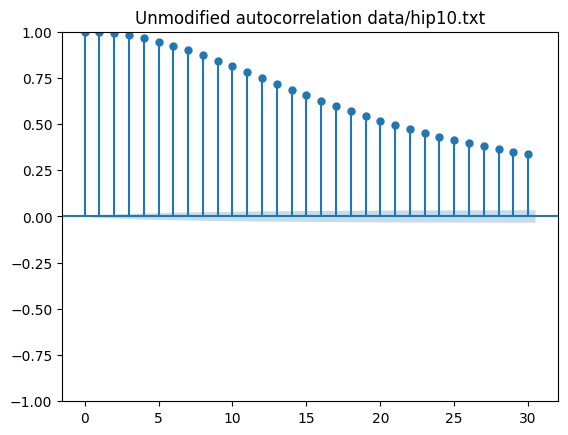

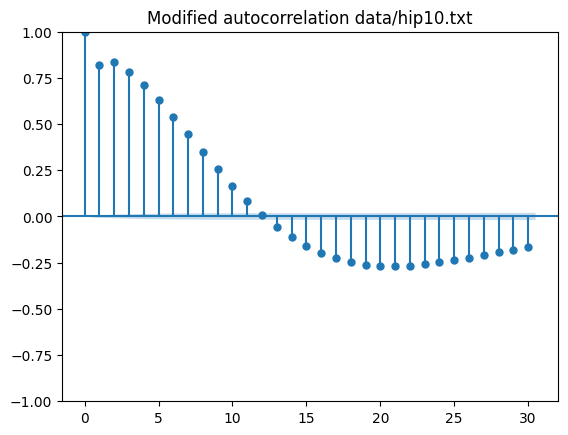

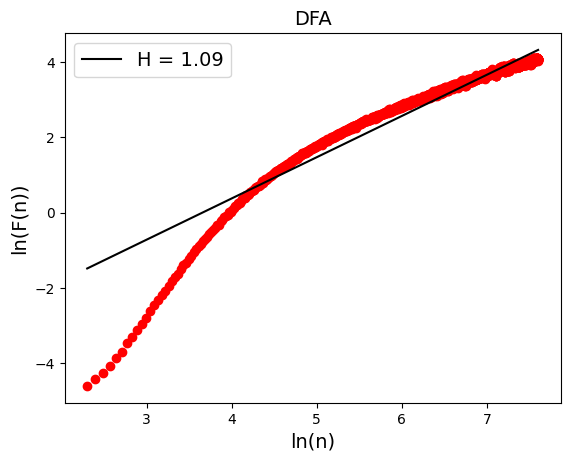

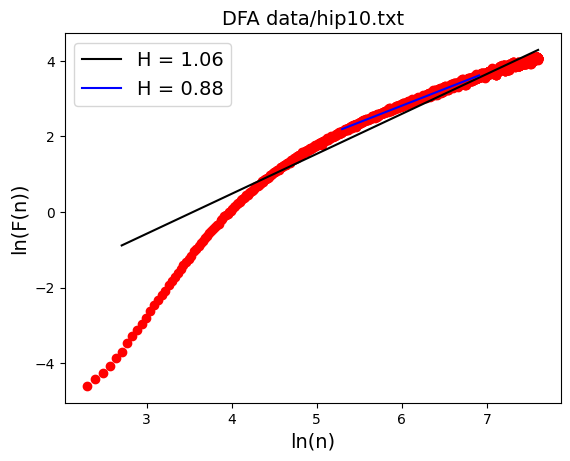

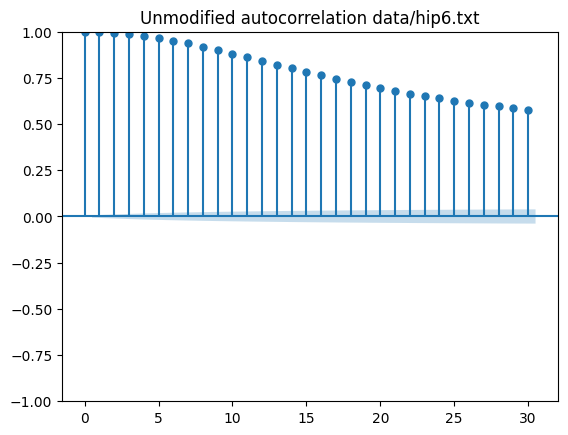

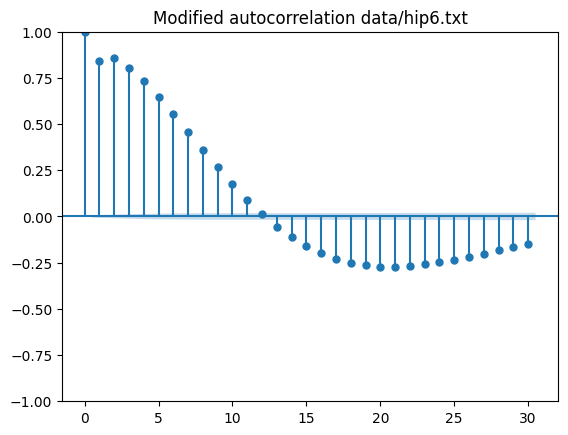

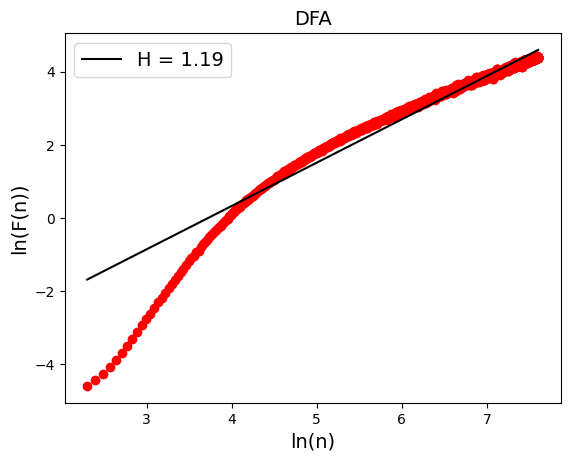

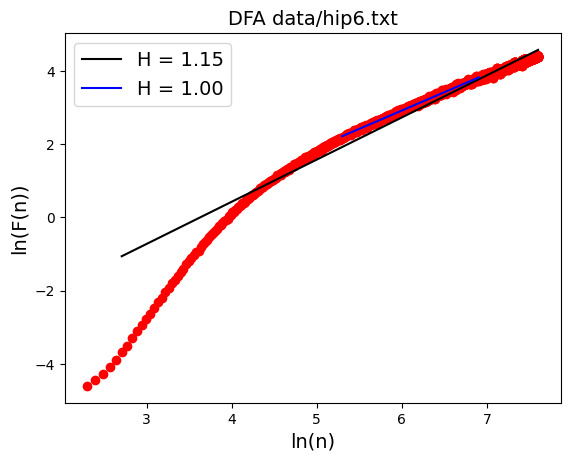

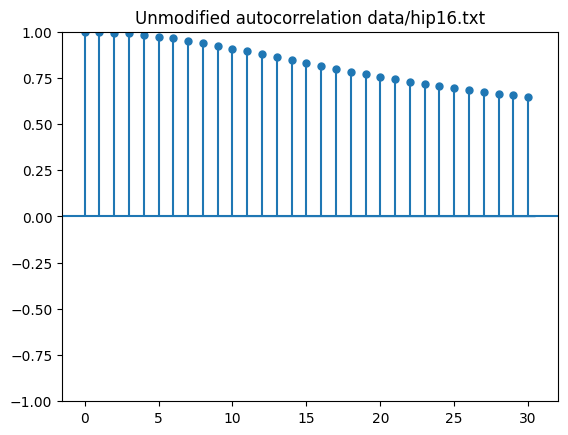

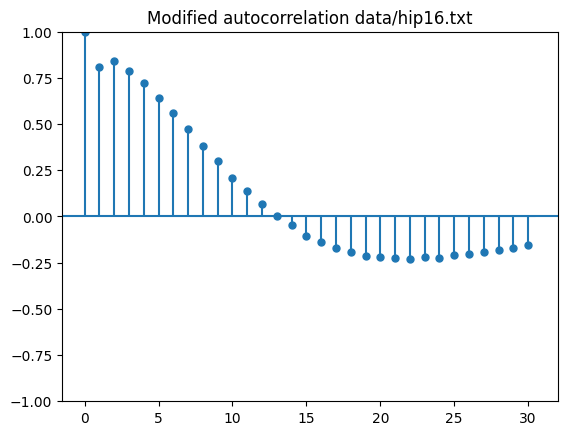

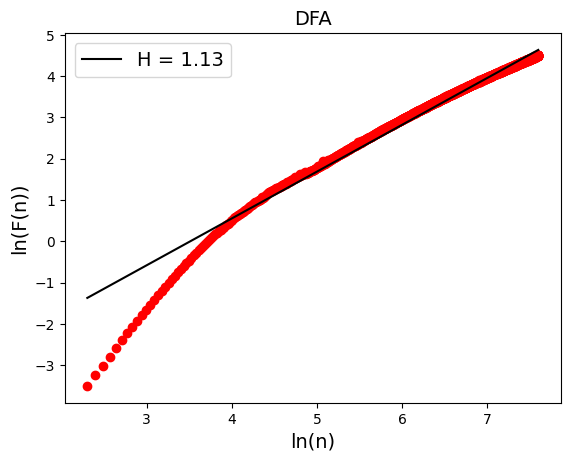

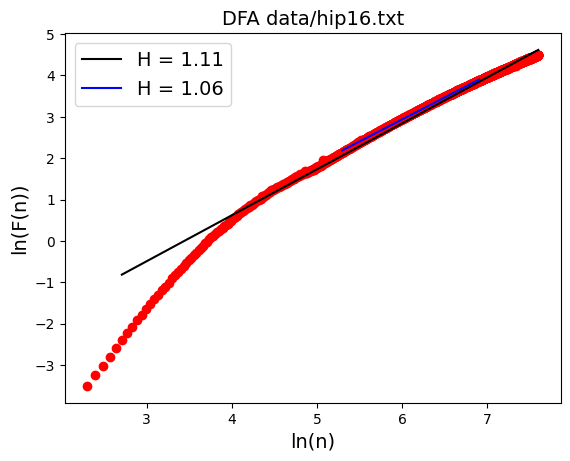

In [1]:
import os
import glob
import matplotlib.pyplot as plt
from monostable_model import calculate_autocorelation_dfa, calculate_autocorelation_acf
import numpy as np

# Find all hip files in the data directory
file_pattern = os.path.join("data", "hip*.txt")
files = glob.glob(file_pattern)
batch_size = 1
# Process each file
for file_path in files:
    cnt = 0
    sum = 0
    file_data = []
    
    with open(file_path) as data_file:
        for record in data_file:
            if cnt < batch_size:
                record = record.strip()
                sum += float(record)
                cnt += 1
            else:
                cnt = 0
                file_data.append(sum / batch_size)
                sum = 0
    
    # Calculate autocorrelation
    calculate_autocorelation_acf(file_data, title=file_path)
    calculate_autocorelation_dfa(file_data, title=file_path)

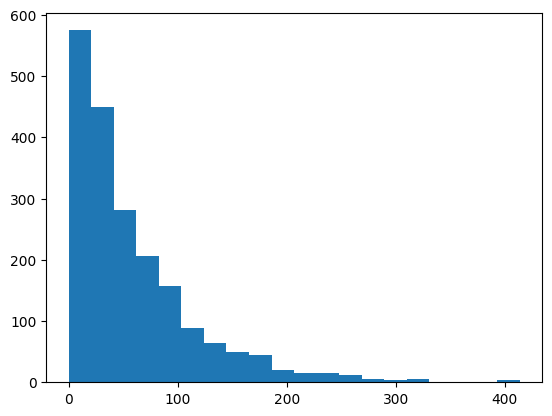

In [2]:
import numpy as np
import matplotlib.pyplot as plt
gen = np.random.Generator(np.random.PCG64(seed=12345))
delta_t = 0.0001 * 100
d = []
for i in range(2000):
    d.append(gen.exponential(60.0))
plt.hist(d,bins=20)
plt.show()


<Figure size 640x480 with 0 Axes>

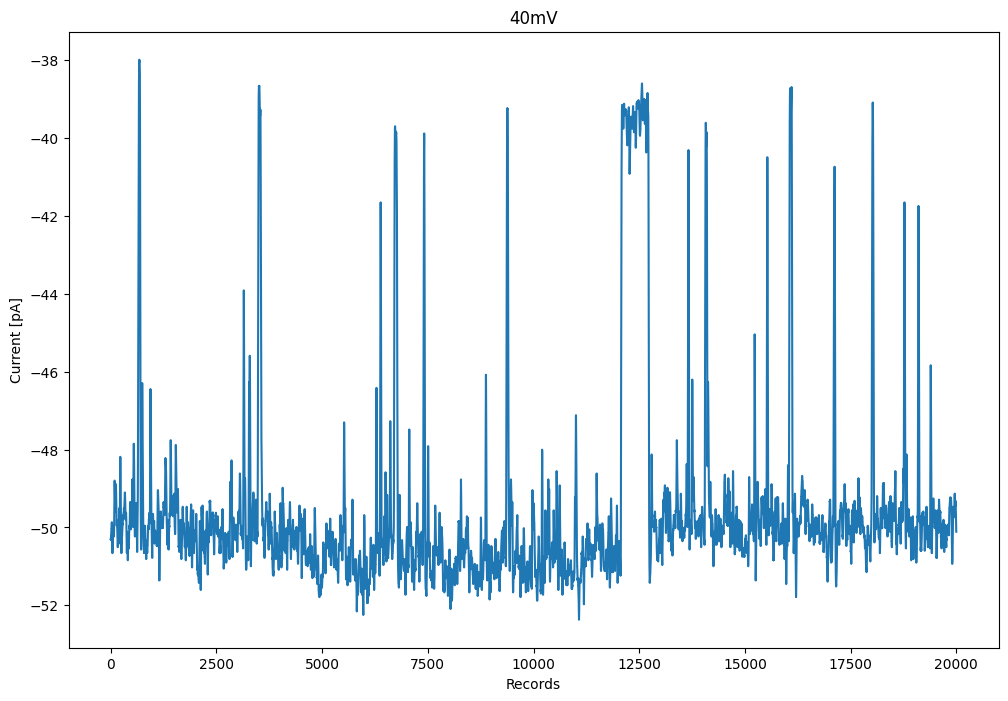

<Figure size 640x480 with 0 Axes>

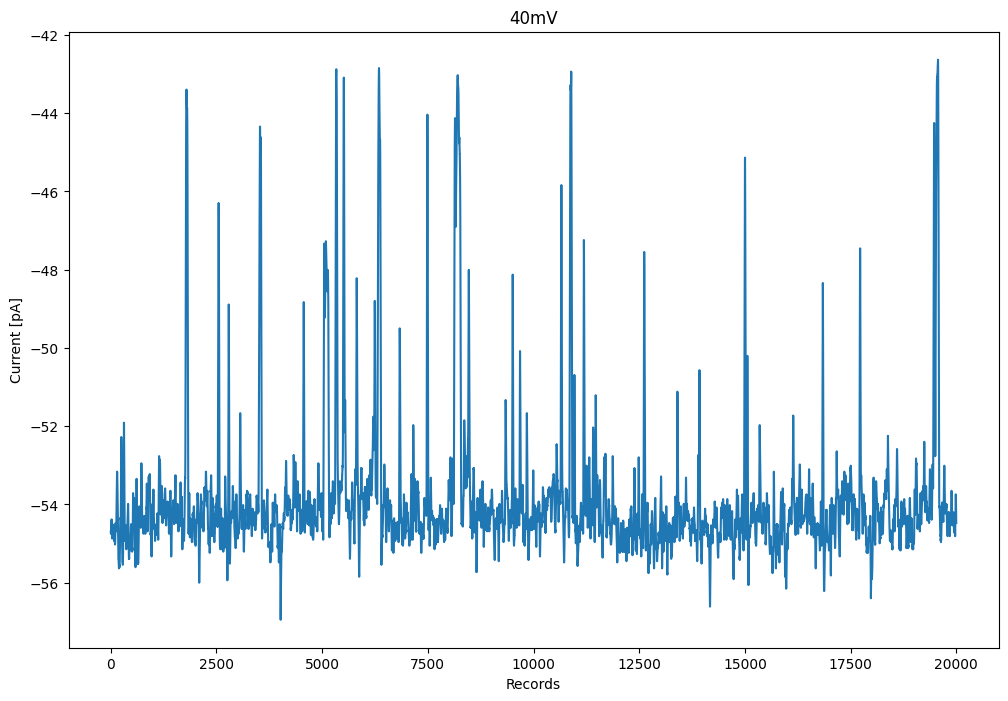

<Figure size 640x480 with 0 Axes>

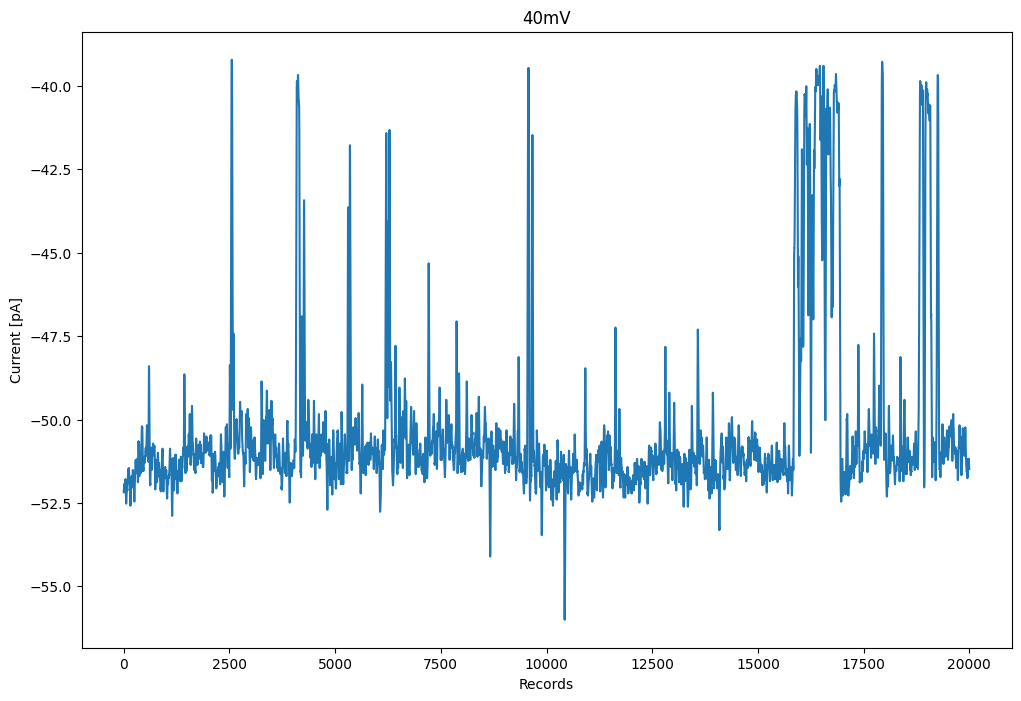

<Figure size 640x480 with 0 Axes>

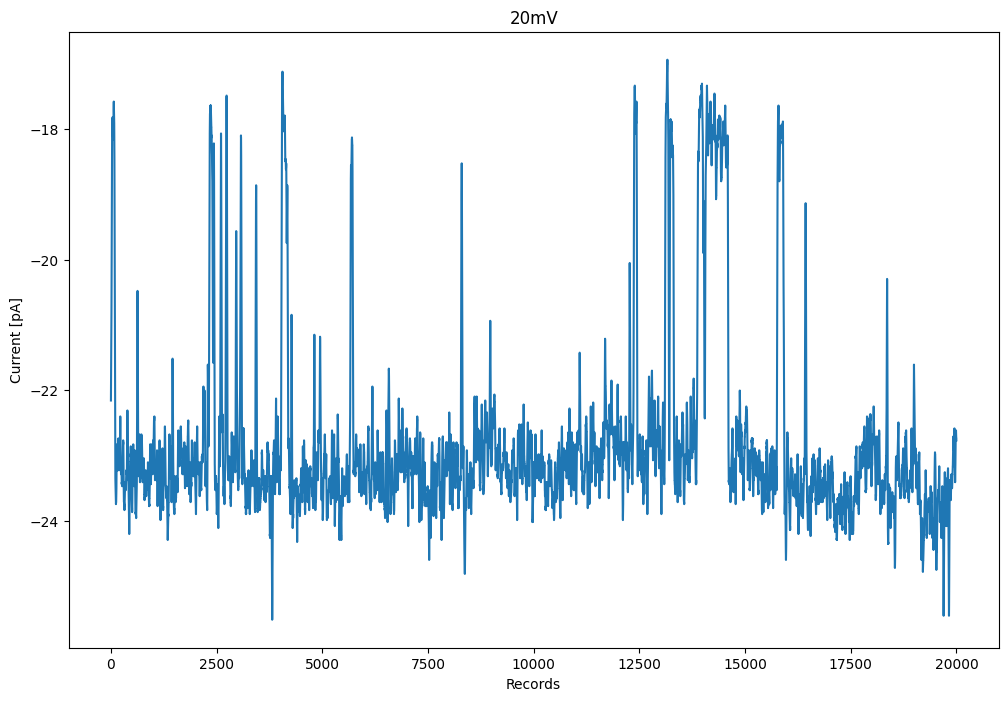

<Figure size 640x480 with 0 Axes>

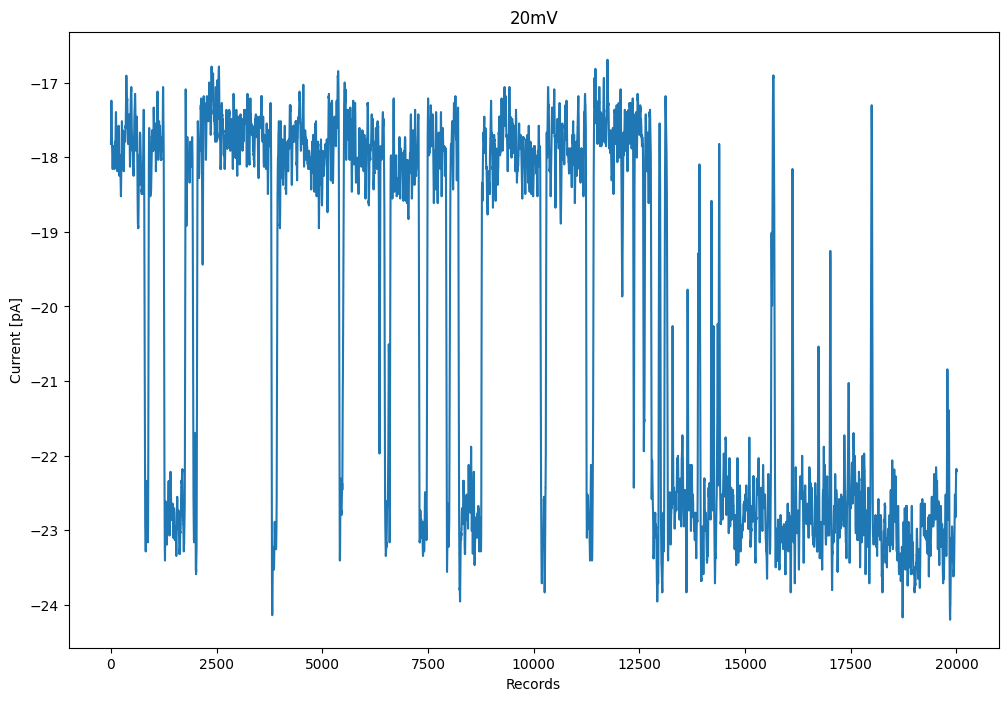

<Figure size 640x480 with 0 Axes>

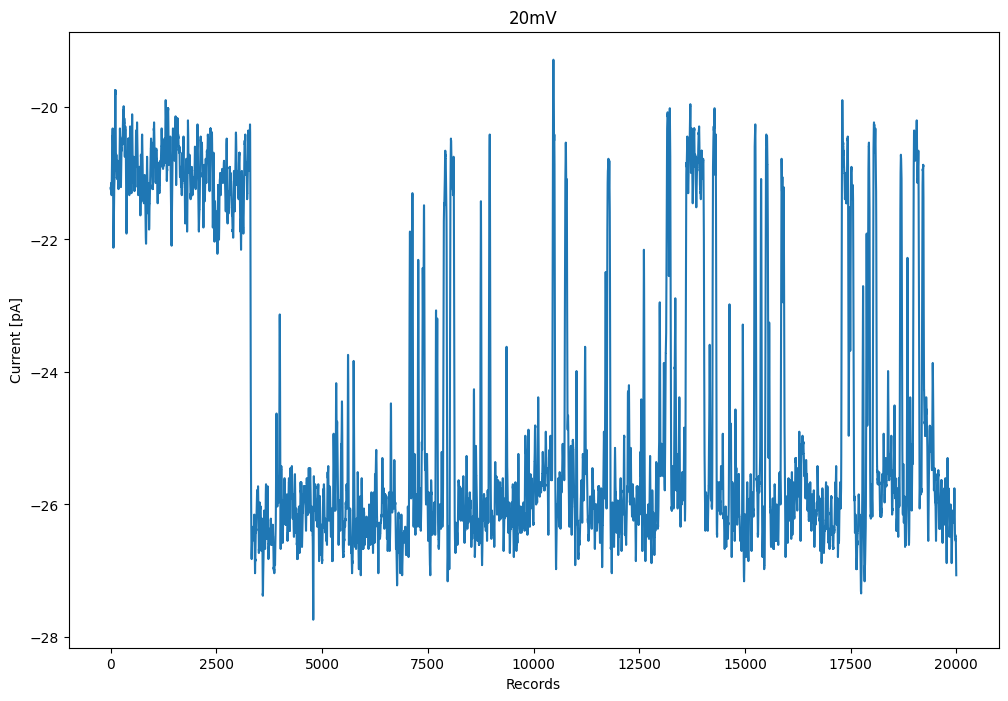

<Figure size 640x480 with 0 Axes>

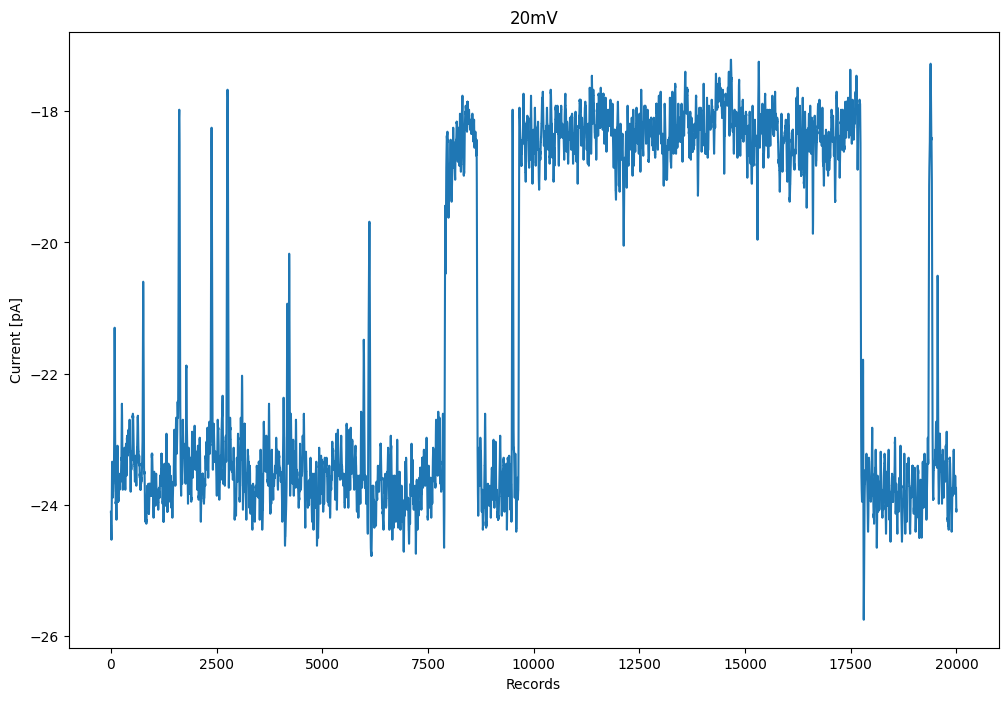

<Figure size 640x480 with 0 Axes>

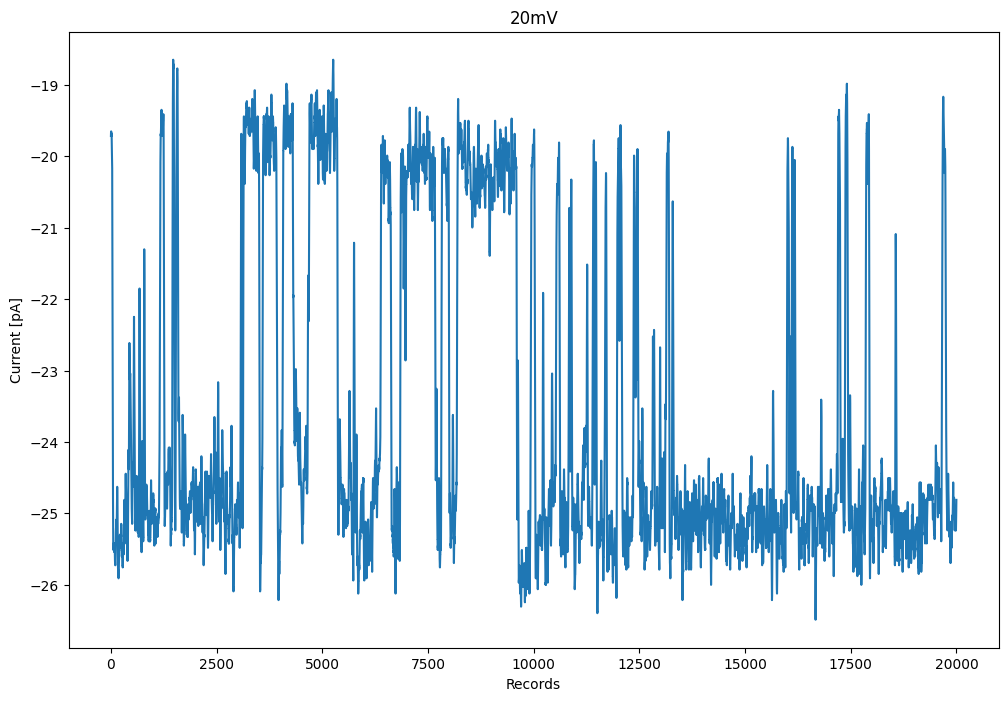

<Figure size 640x480 with 0 Axes>

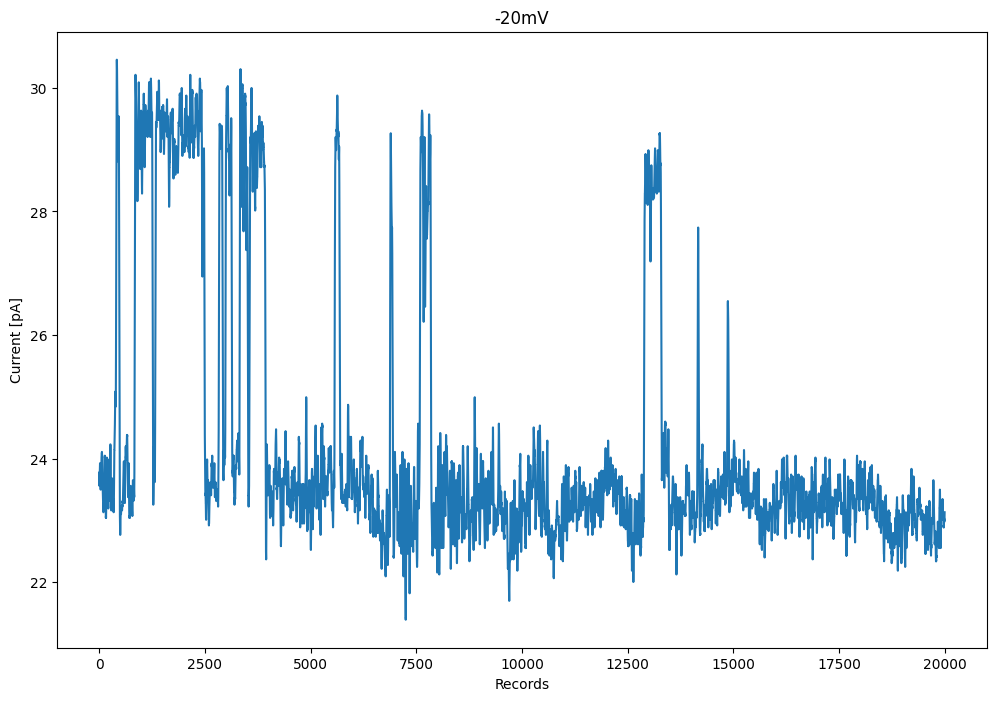

<Figure size 640x480 with 0 Axes>

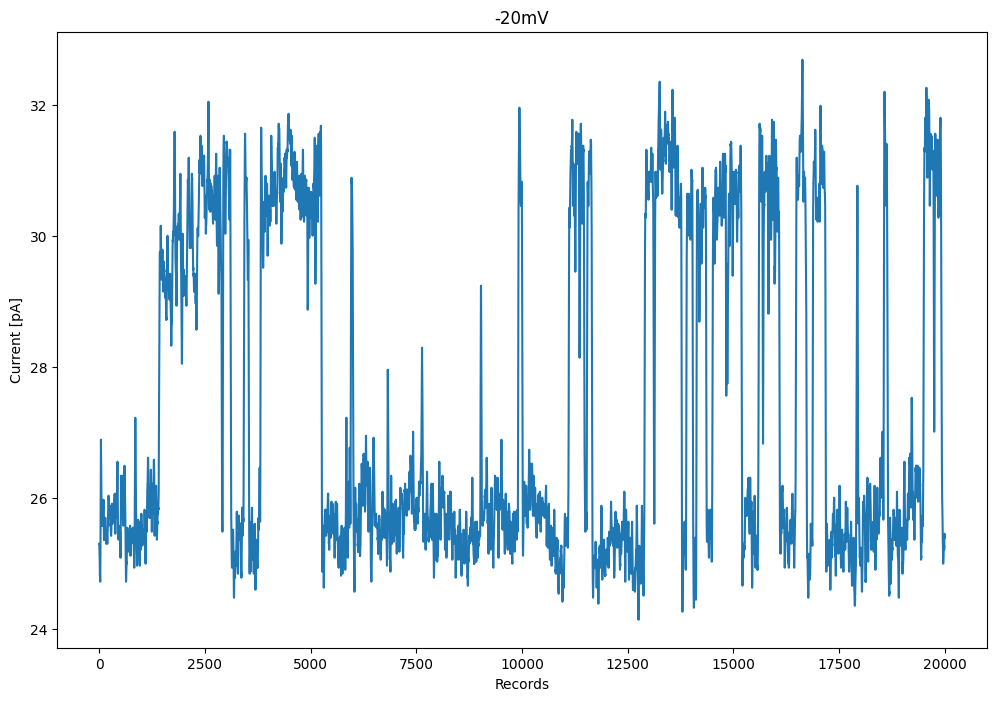

<Figure size 640x480 with 0 Axes>

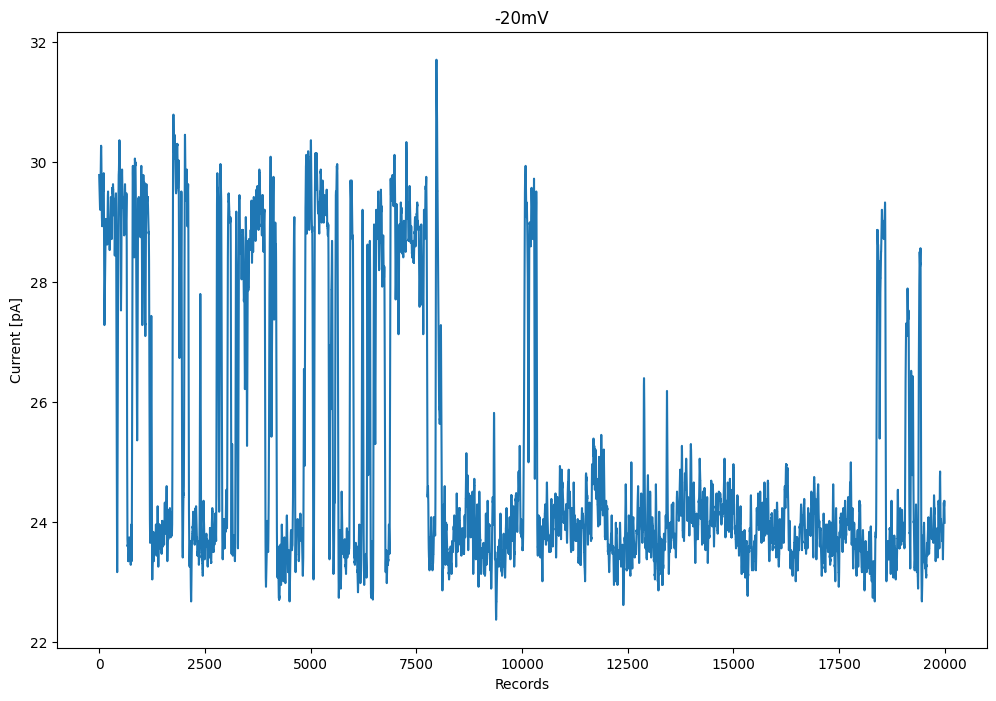

<Figure size 640x480 with 0 Axes>

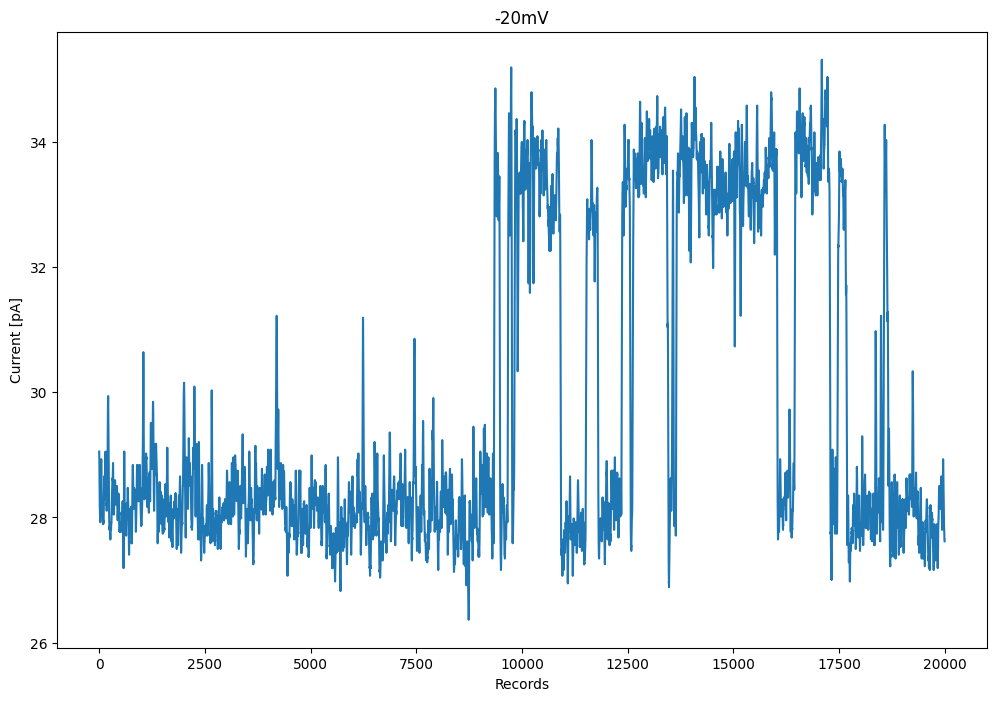

<Figure size 640x480 with 0 Axes>

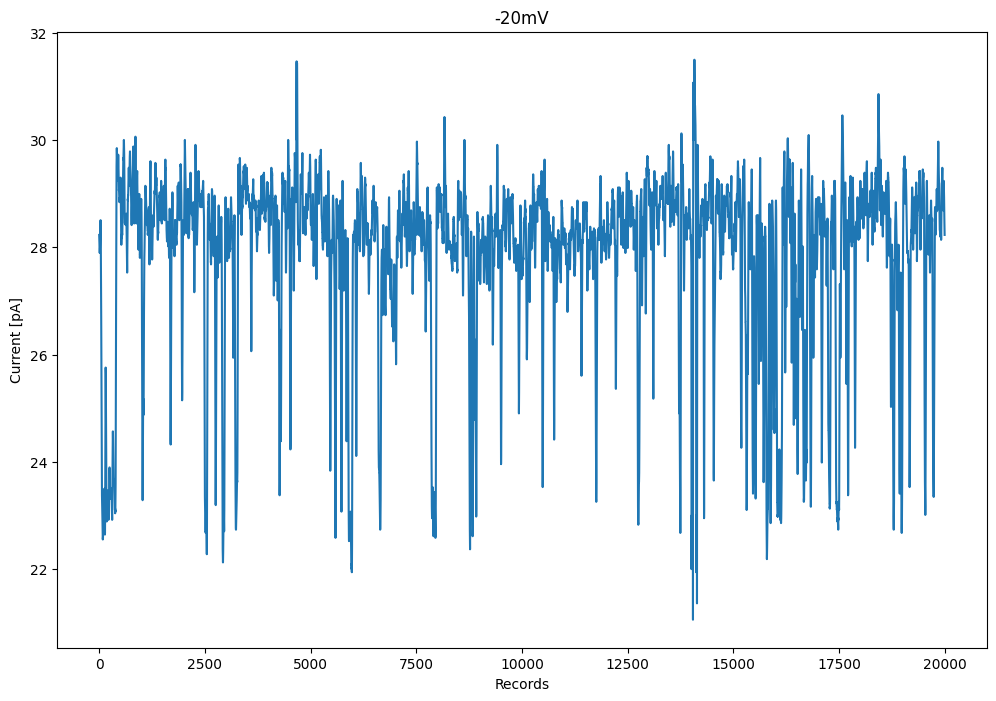

<Figure size 640x480 with 0 Axes>

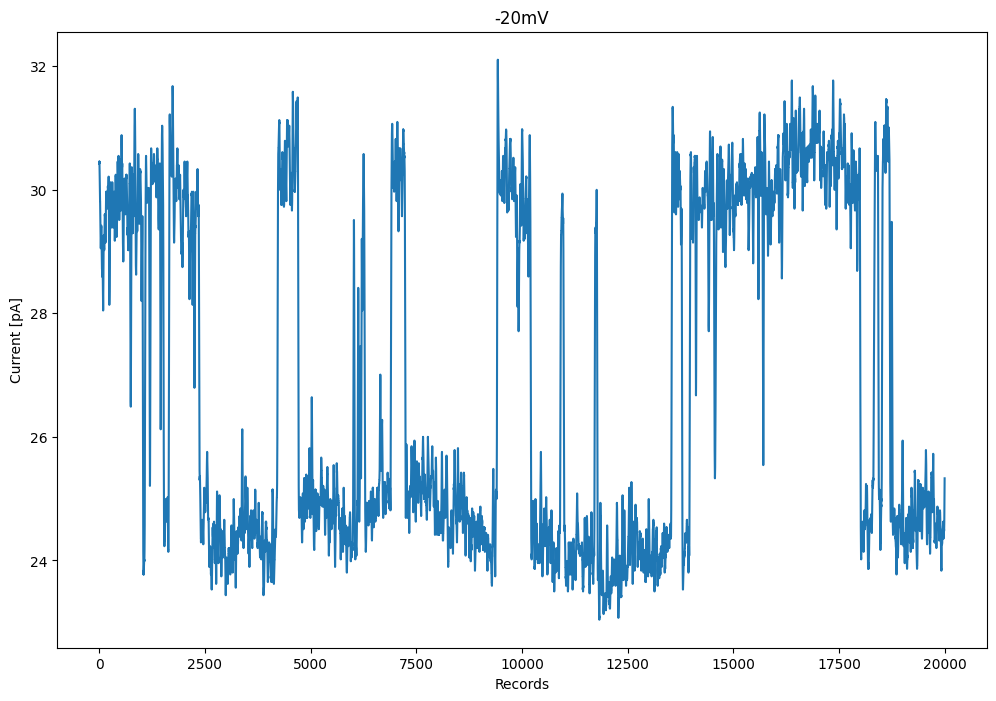

<Figure size 640x480 with 0 Axes>

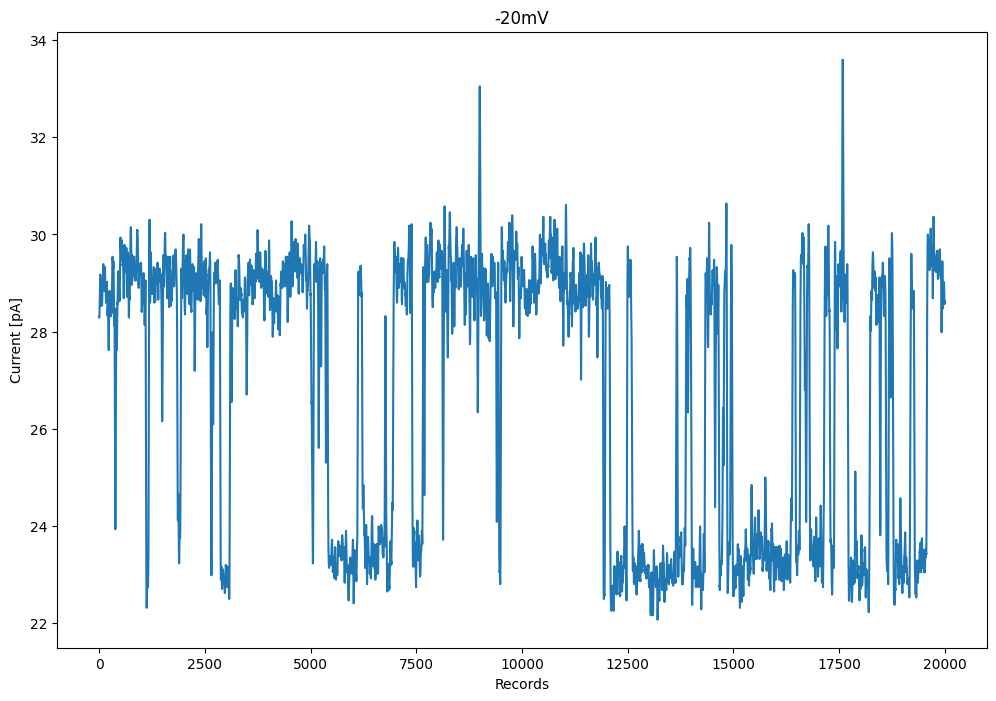

<Figure size 640x480 with 0 Axes>

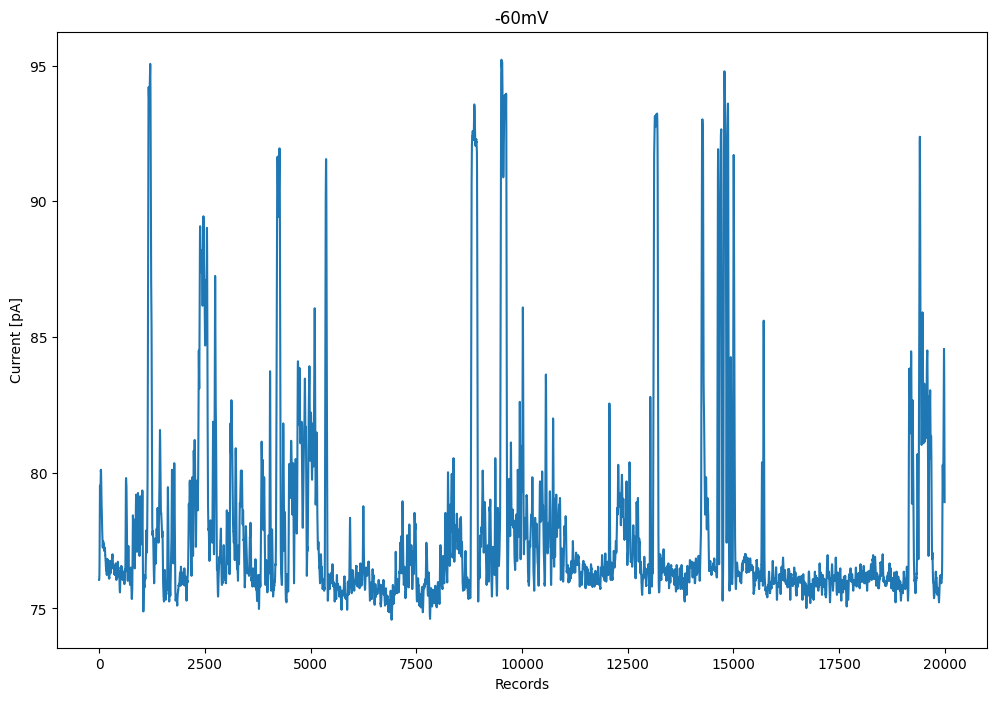

<Figure size 640x480 with 0 Axes>

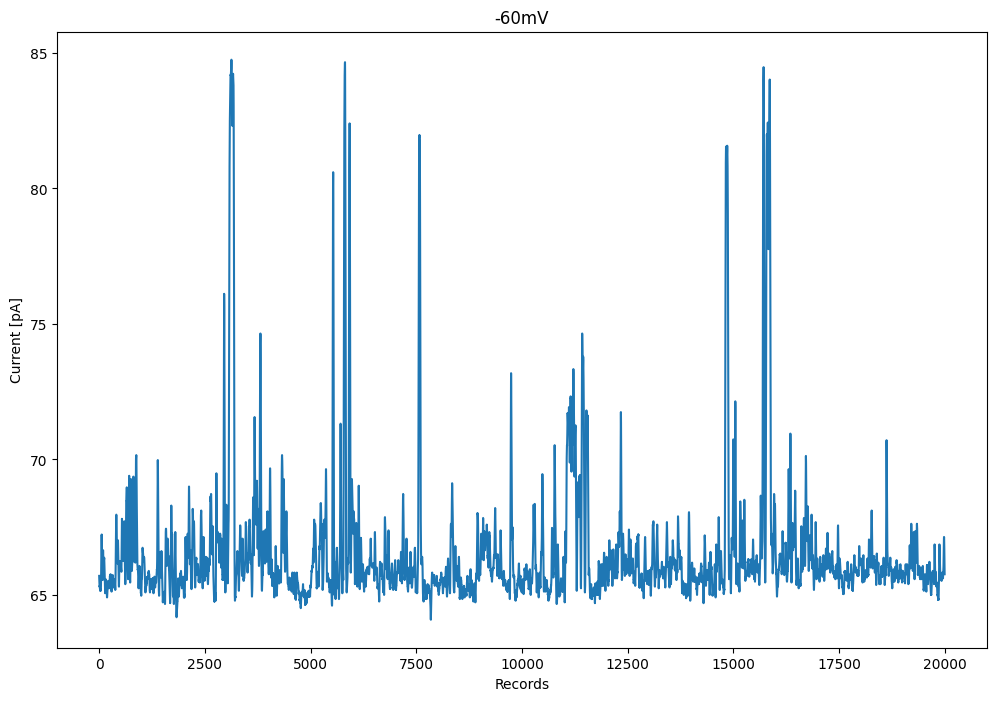

<Figure size 640x480 with 0 Axes>

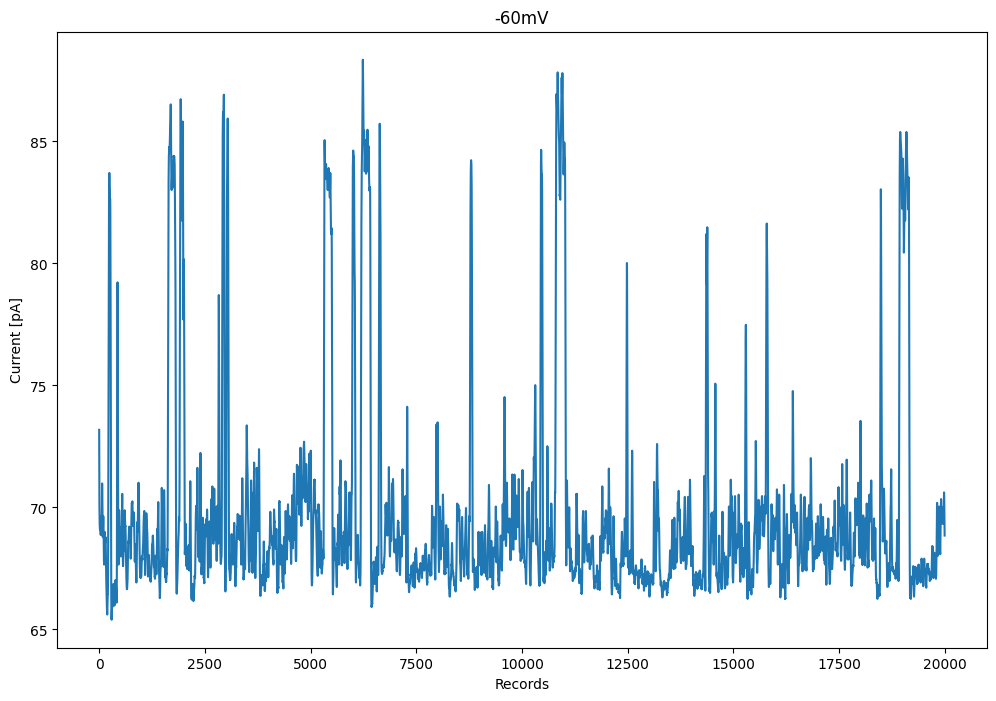

<Figure size 640x480 with 0 Axes>

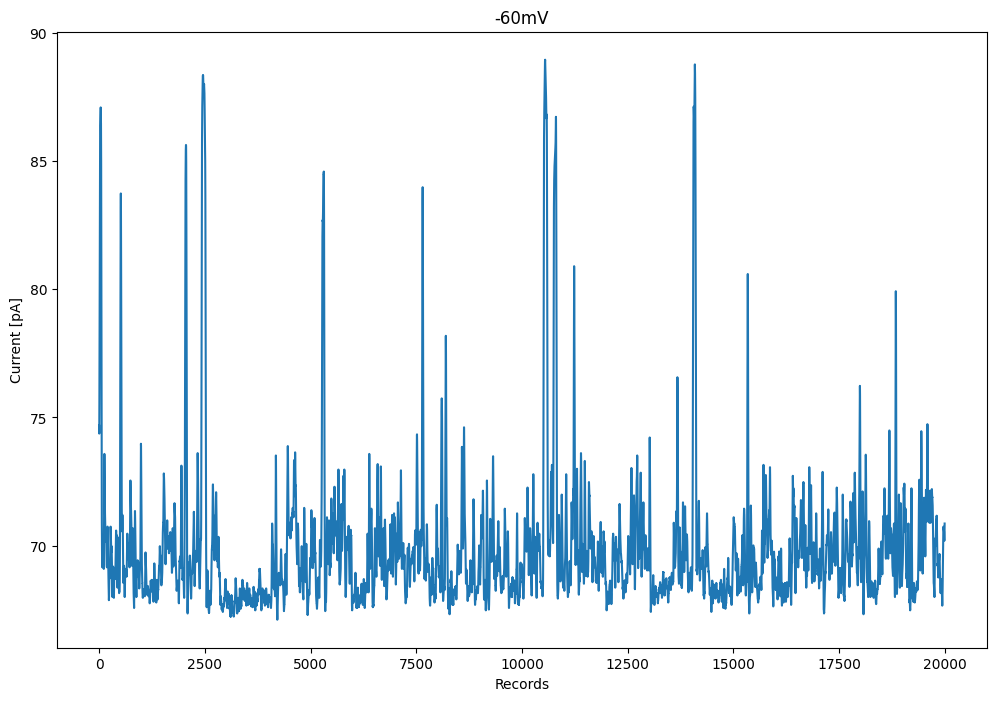

<Figure size 640x480 with 0 Axes>

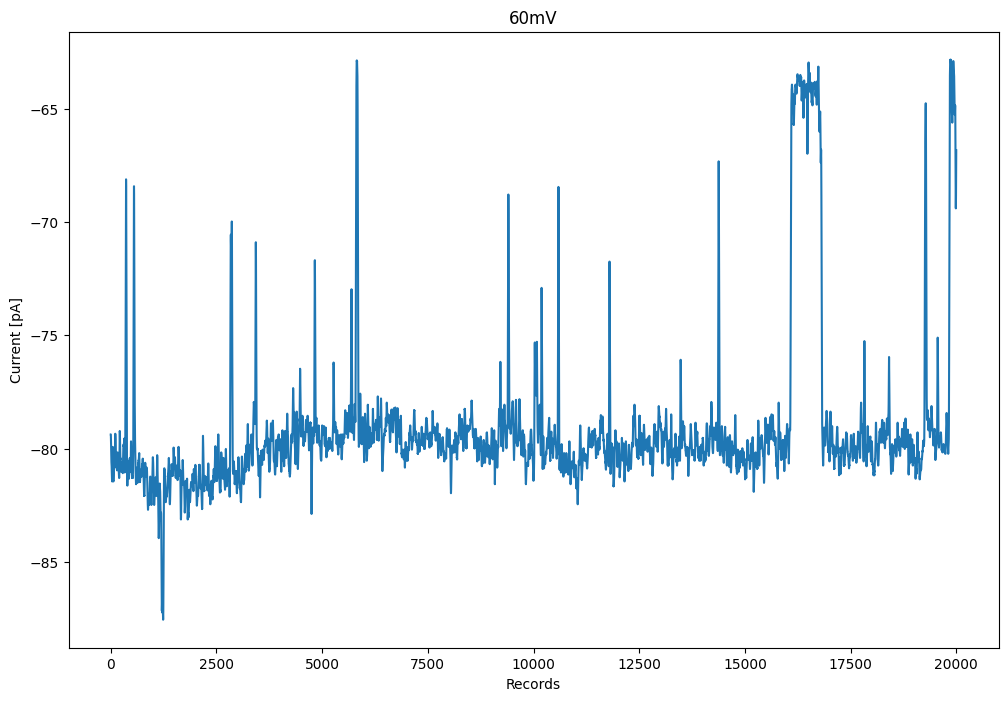

<Figure size 640x480 with 0 Axes>

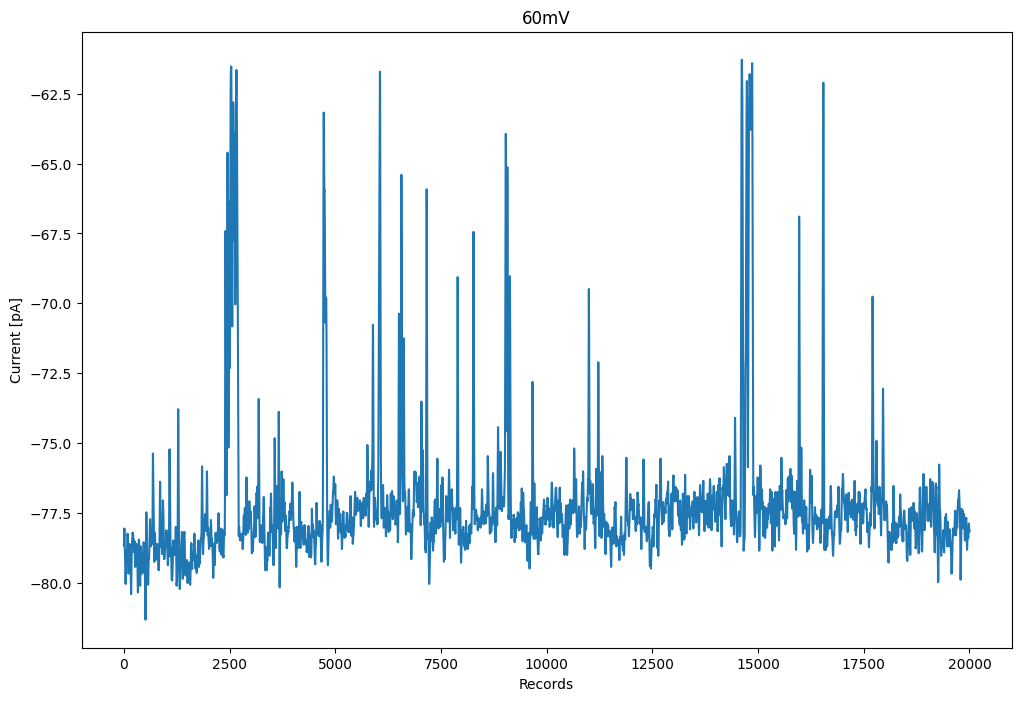

<Figure size 640x480 with 0 Axes>

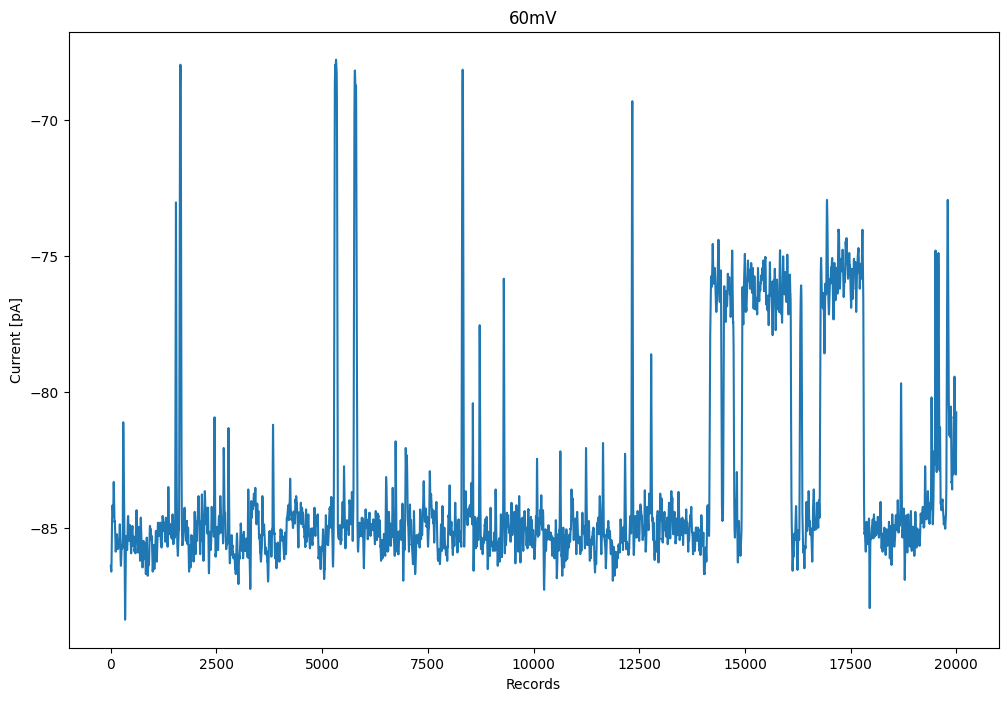

<Figure size 640x480 with 0 Axes>

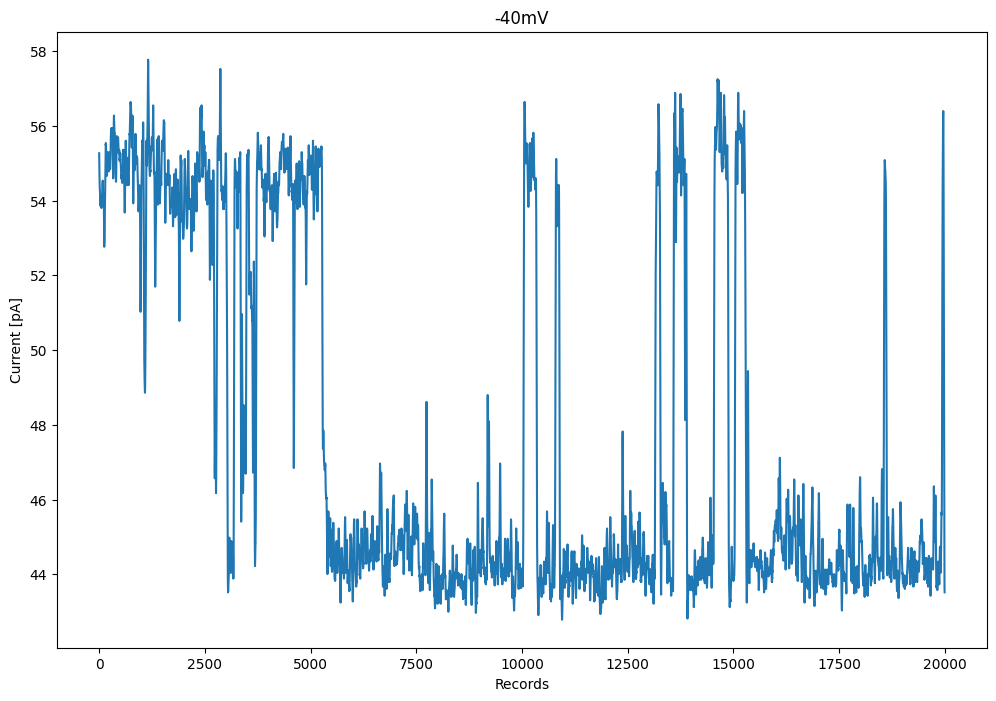

<Figure size 640x480 with 0 Axes>

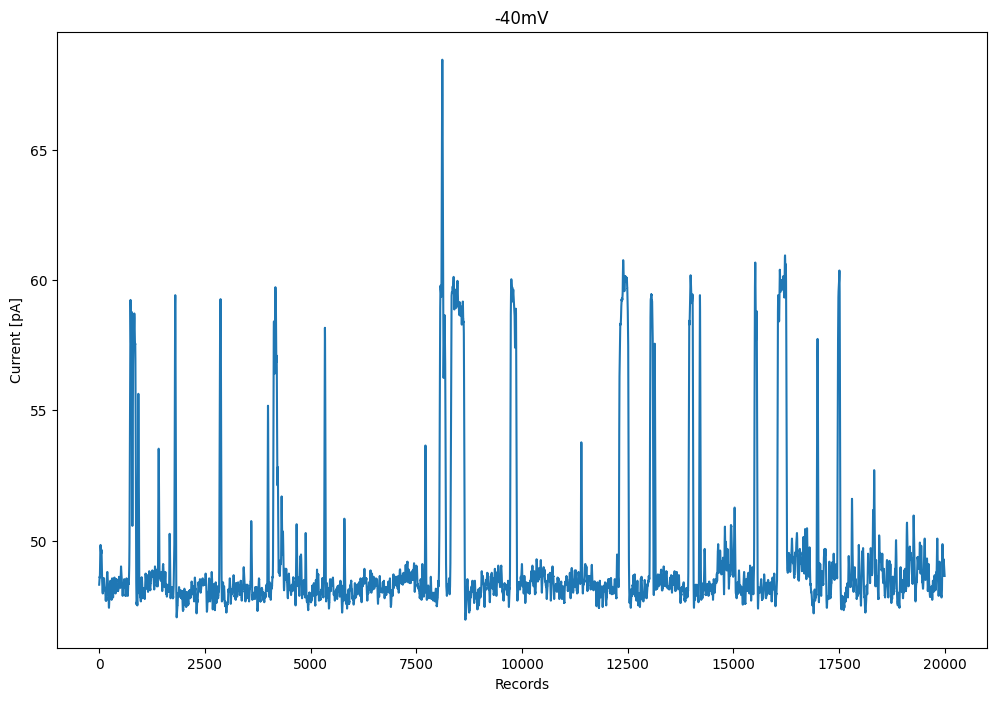

<Figure size 640x480 with 0 Axes>

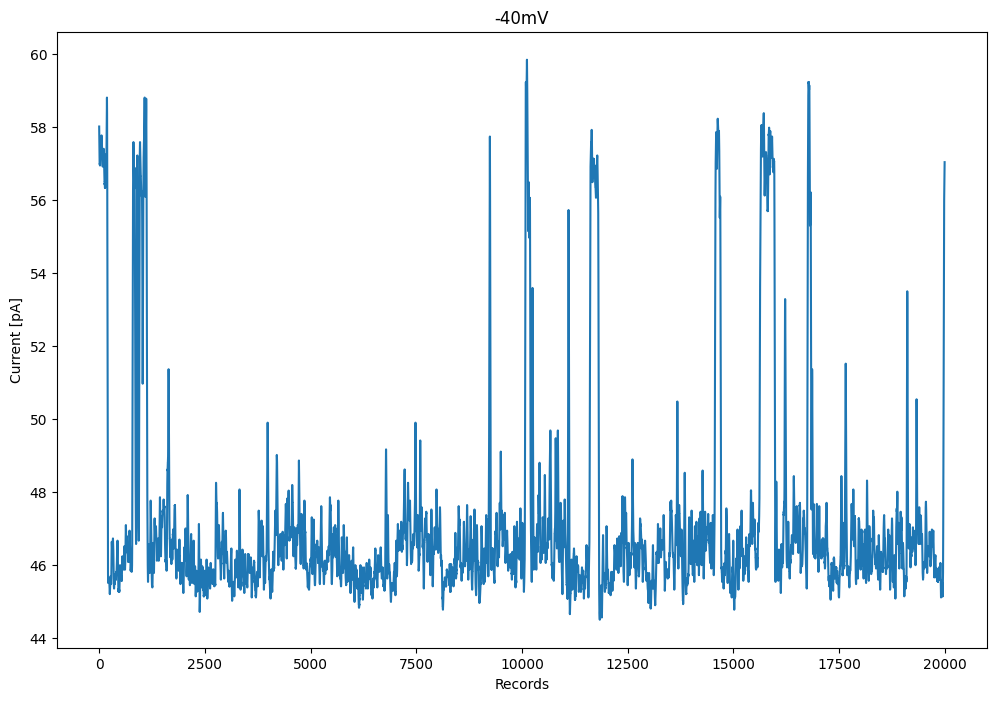

<Figure size 640x480 with 0 Axes>

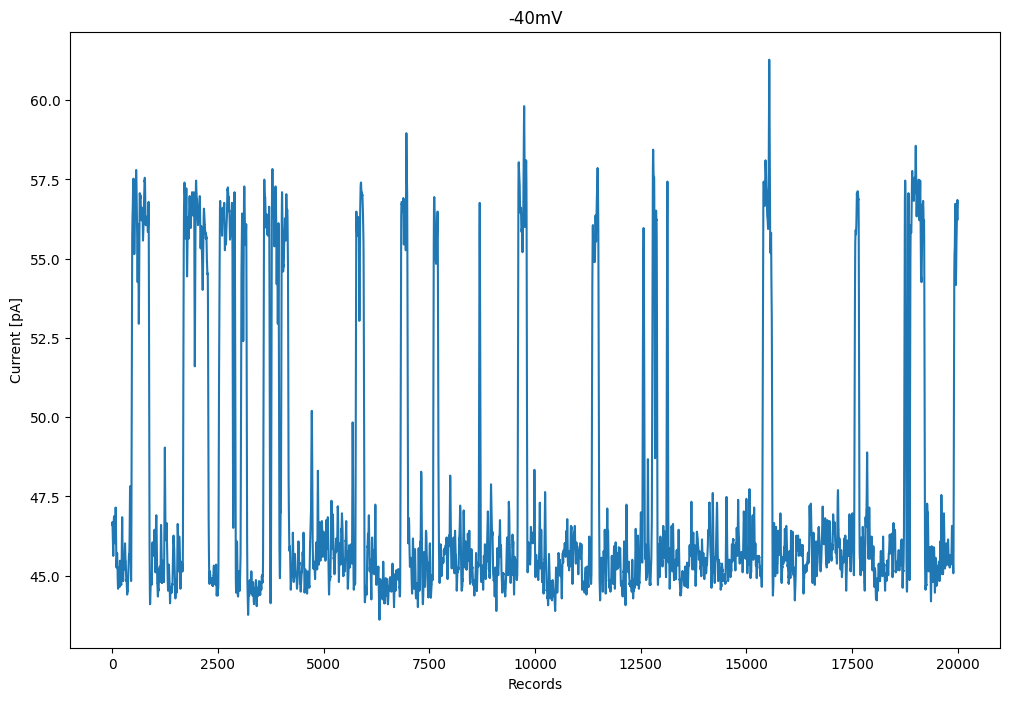

<Figure size 640x480 with 0 Axes>

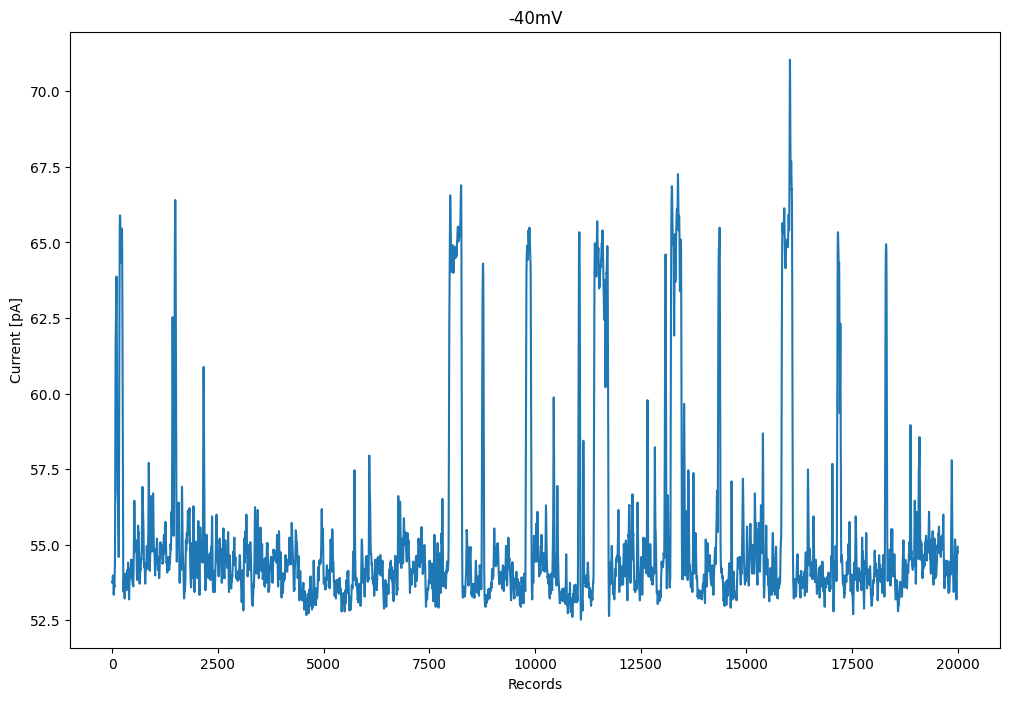

In [3]:
import os
import glob
import matplotlib.pyplot as plt
# from monostable_model import calculate_autocorelation_dfa, calculate_autocorelation_acf
import numpy as np
from ion_channel import IonChannel
ic = IonChannel()
# Find all hip files in the data directory
file_pattern = os.path.join("data", "normalna_aktywnosc", '*mV', "e*.txt")
files = glob.glob(file_pattern)
batch_size = 1
# Process each file
for file_path in files:
    cnt = 0
    sum = 0
    file_data = []
    
    with open(file_path) as data_file:
        for record in data_file:
            if cnt < batch_size:
                record = record.strip()
                sum += float(record)
                cnt += 1
            else:
                cnt = 0
                file_data.append(sum / batch_size)
                sum = 0
    
    # Calculate autocorrelation
    _ = file_path.split('/')
    folder = _[2]
    if(not os.path.isdir(f"outputs/{folder}")):
        os.mkdir(f"outputs/{folder}")
    file_name = _[3].split('.')[0]
    plt.clf()  
    plt.figure(figsize=(12,8))
    plt.title(folder)
    plt.plot(file_data[:20000])
    # plt.vlines(x=self.breakpoints, ymin=np.min(self.data_transposed[1]), ymax=np.max(self.data_transposed[1]), color='red', linestyle='--')
    plt.xlabel("Records")
    plt.ylabel("Current [pA]")
    plt.show()

In [21]:
import numpy as np

# Define the total number of points
num_points = 50000
num_sections = 3
points_per_section = num_points // num_sections  # Ensure equal split

# Define logarithmic range (example: from e^0 to e^10)
start_exp = 0       # e^0 = 1
end_exp = 10        # e^10 (≈22026.47)

# Define intermediate split points
mid1_exp = start_exp + (end_exp - start_exp) / num_sections
mid2_exp = start_exp + 2 * (end_exp - start_exp) / num_sections

# Generate three equal parts in logarithmic scale
section1 = np.logspace(start_exp, mid1_exp, points_per_section, base=np.e)
section2 = np.logspace(mid1_exp, mid2_exp, points_per_section, base=np.e)
section3 = np.logspace(mid2_exp, end_exp, points_per_section, base=np.e)

# Concatenate all sections
log_spaced_values = np.concatenate([section1, section2, section3])

print(log_spaced_values[:10])  # Print first 10 values as a preview
print(log_spaced_values.shape)  # Verify total count is 50000


[1.         1.00020004 1.00040012 1.00060024 1.0008004  1.0010006
 1.00120084 1.00140112 1.00160144 1.0018018 ]
(49998,)


158.86471833242643